## Ejercicio 1: Análisis de Datos de Calidad del Aire en California

Utilizando el dataset de calidad del aire de California disponible en:
https://www.kaggle.com/datasets/sogun3/uspollution

O directamente del EPA (Environmental Protection Agency):
https://aqs.epa.gov/aqsweb/airdata/download_files.html

Realiza las siguientes tareas:

1. Carga el dataset en un DataFrame y filtra los datos para quedarte solo con las mediciones de California

2. Realiza una limpieza inicial de los datos:
   - Identifica y maneja valores nulos
   - Convierte las columnas de fecha al formato correcto
   - Verifica y corrige valores atípicos

3. Analiza los contaminantes principales (NO2, SO2, CO, O3):
   - Calcula promedios mensuales por ciudad
   - Identifica las 5 ciudades con mayores niveles de cada contaminante
   - Determina si hay patrones estacionales

4. Crea nuevas columnas derivadas:
   - Índice de calidad del aire simplificado
   - Clasificación por niveles de riesgo
   - Indicadores de cumplimiento de estándares EPA

5. Realiza análisis temporal:
   - Calcula tendencias anuales
   - Identifica días críticos (con valores extremos)
   - Genera medias móviles semanales y mensuales

6. Exporta los resultados:
   - Guarda un resumen por ciudad en CSV
   - Crea un archivo con los días críticos identificados
   - Genera un reporte con las estadísticas principales

Conceptos evaluados:
- Filtrado y selección de datos
- Manejo de fechas y series temporales
- Agregaciones y groupby
- Creación de nuevas variables
- Detección de outliers
- Exportación de resultados
- Análisis estadístico básico

Bonus:
- Crear visualizaciones de las tendencias encontradas
- Realizar un análisis de correlación entre contaminantes
- Implementar un sistema de alertas basado en umbrales"

## Ejercicio 2: Análisis de Datos del Mundial de Fútbol

Utilizando el dataset histórico de la FIFA World Cup disponible en:
https://www.kaggle.com/datasets/abecklas/fifa-world-cup

Desarrolla:
1. Carga y combina los datasets de partidos y equipos usando merge
2. Calcula estadísticas por país:
   - Total de participaciones en mundiales
   - Goles anotados y recibidos
   - Victorias, derrotas y empates
3. Identifica los 5 países más exitosos basándote en una métrica que combines
4. Crea un DataFrame pivotado que muestre el progreso de cada país por año
5. Genera visualizaciones para mostrar las tendencias históricas

Conceptos evaluados: merge de DataFrames, pivot tables, agregaciones múltiples, creación de métricas compuestas

## Ejercicio 3: Análisis de Series Temporales de Bolsa

Usando el dataset de Yahoo Finance para el índice S&P 500 (^GSPC) disponible vía pandas_datareader:
https://finance.yahoo.com/quote/%5EGSPC/

Realiza:
1. Obtén los datos de los últimos 5 años usando pandas_datareader
2. Calcula retornos diarios, semanales y mensuales
3. Identifica los 10 días con mayor volatilidad
4. Implementa una ventana móvil de 20 días para calcular:
   - Media móvil
   - Desviación estándar móvil
   - Máximos y mínimos móviles
5. Crea indicadores técnicos básicos (RSI, MACD)
6. Genera visualizaciones de los indicadores

Conceptos evaluados: series temporales, ventanas móviles, cálculos financieros, resampleo de datos

## Ejercicio 4: Análisis de Datos de COVID-19

Utilizando el dataset de Our World in Data sobre COVID-19:
https://github.com/owid/covid-19-data/tree/master/public/data

Desarrolla:
1. Carga y limpia el dataset
2. Calcula para cada país:
   - Tasa de positividad diaria
   - Media móvil de 7 días de casos nuevos
   - Tiempo hasta alcanzar picos de casos
3. Agrupa países por continente y compara métricas clave
4. Identifica correlaciones entre variables (casos, muertes, vacunación)
5. Crea un dashboard básico con las métricas más relevantes

Conceptos evaluados: limpieza de datos, análisis por grupos, correlaciones, visualización avanzada

## Ejercicio 5: Análisis de Reseñas de Amazon

Usando el dataset de reseñas de Amazon disponible en:
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

Realiza:
1. Carga y preprocesa el dataset
2. Analiza la distribución de puntuaciones
3. Identifica patrones temporales en las reseñas:
   - Evolución de puntuaciones promedio por mes/año
   - Cambios en la longitud de las reseñas
4. Agrupa productos por categoría y analiza diferencias en:
   - Puntuación promedio
   - Cantidad de reseñas
   - Sentimiento general
5. Crea un sistema simple de detección de reseñas potencialmente falsas basado en múltiples criterios

Conceptos evaluados: text processing, análisis temporal, detección de anomalías, agregaciones complejas

In [1]:
import pandas as pd

# Cargar el dataset del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Ejercicio: Análisis de pasajeros del Titanic

# 1. Exploración inicial
print("Primeras 5 filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# 2. Limpieza básica de datos
# Manejar valores nulos en la columna Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 3. Análisis básico
# Calcular tasa de supervivencia por clase
supervivencia_clase = df.groupby('Pclass')['Survived'].mean()
print("\nTasa de supervivencia por clase:")
print(supervivencia_clase)

# 4. Crear nuevas variables
# Crear categoría de edad
df['AgeGroup'] = pd.cut(df['Age'], 
                       bins=[0, 12, 18, 35, 50, 100],
                       labels=['Niño', 'Adolescente', 'Joven', 'Adulto', 'Mayor'])

# 5. Análisis por grupos
# Calcular estadísticas por grupo de edad y género
stats_grupos = df.groupby(['AgeGroup', 'Sex'])['Survived'].agg(['count', 'mean'])
print("\nEstadísticas por grupo de edad y género:")
print(stats_grupos)

# 6. Exportar resultados
# Guardar resultados en un nuevo CSV
stats_grupos.to_csv('titanic_statistics.csv')

Primeras 5 filas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

C:\Users\Juanlu\AppData\Local\Temp\ipykernel_21204\1620174557.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Juanlu\AppData\Local\Temp\ipykernel_21204\1620174557.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_grupos = df.groupby(['AgeGroup', 'Sex'])['Survived'].ag

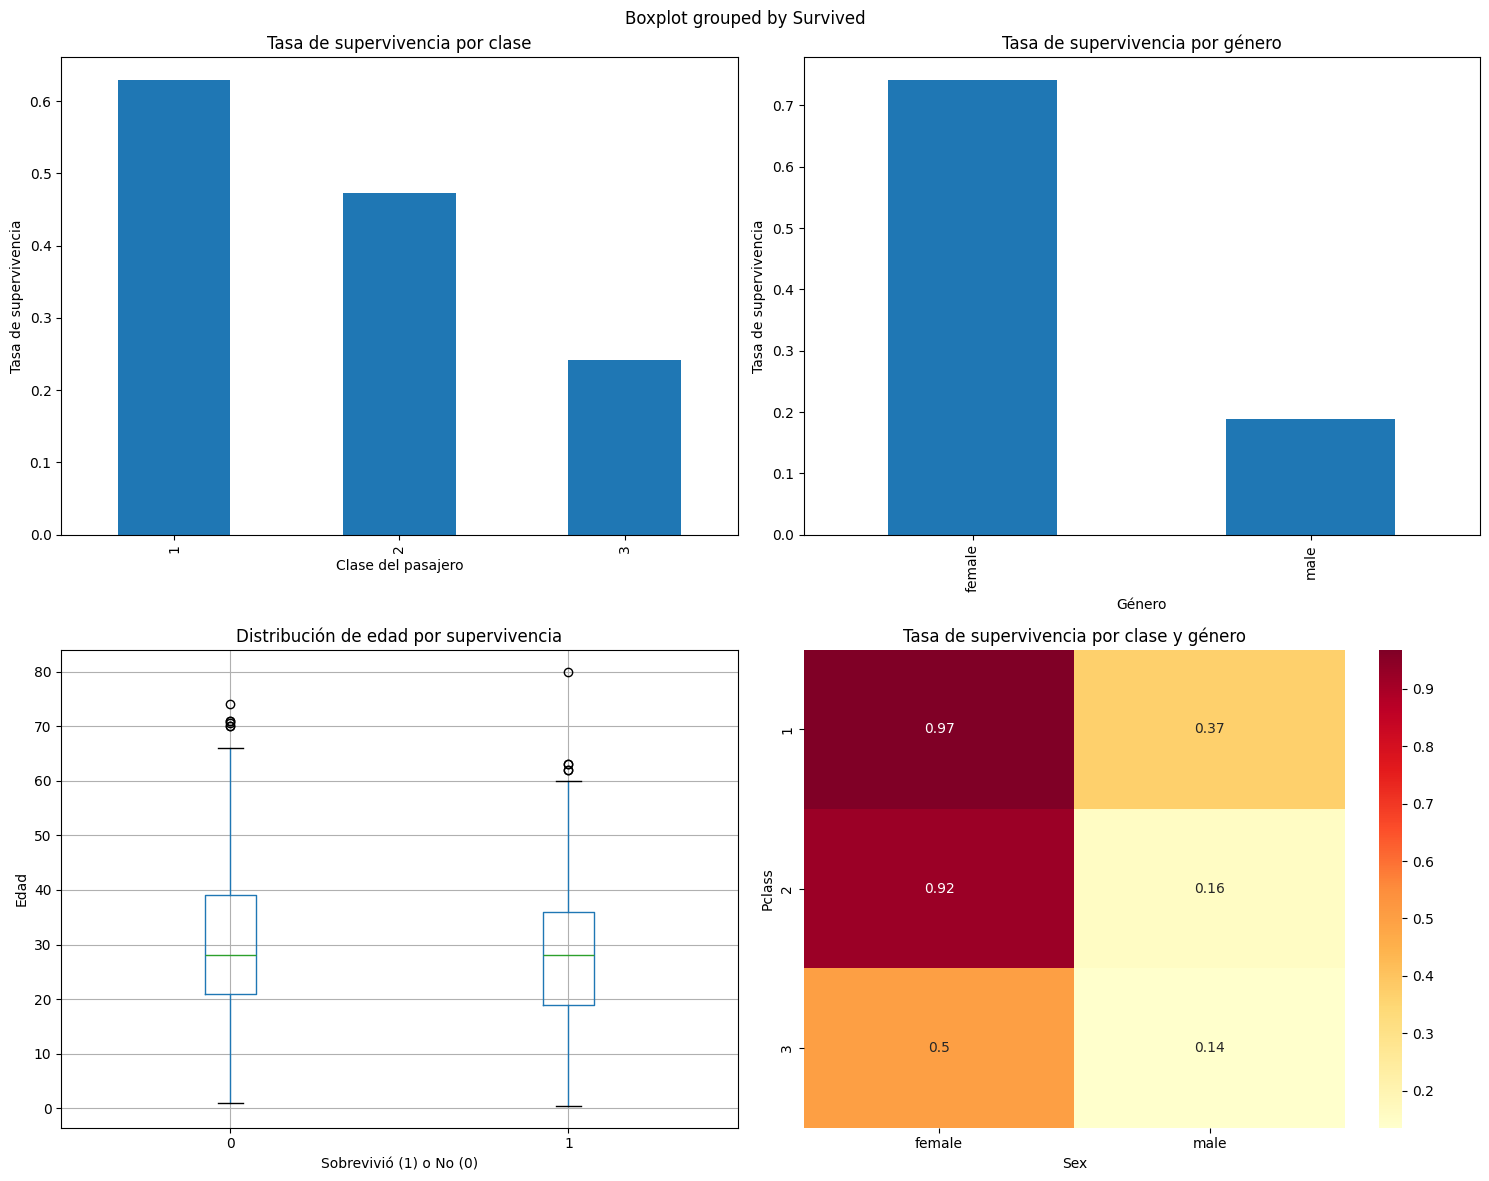


Estadísticas de supervivencia:

Por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Por género:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Crear la figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Gráfico de barras: Supervivencia por clase
supervivencia_clase = df.groupby('Pclass')['Survived'].mean()
supervivencia_clase.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Tasa de supervivencia por clase')
axes[0,0].set_xlabel('Clase del pasajero')
axes[0,0].set_ylabel('Tasa de supervivencia')

# 2. Gráfico de barras: Supervivencia por género
supervivencia_genero = df.groupby('Sex')['Survived'].mean()
supervivencia_genero.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Tasa de supervivencia por género')
axes[0,1].set_xlabel('Género')
axes[0,1].set_ylabel('Tasa de supervivencia')

# 3. Boxplot: Distribución de edad por supervivencia
df.boxplot(column='Age', by='Survived', ax=axes[1,0])
axes[1,0].set_title('Distribución de edad por supervivencia')
axes[1,0].set_xlabel('Sobrevivió (1) o No (0)')
axes[1,0].set_ylabel('Edad')

# 4. Tabla de calor: Supervivencia por clase y género
survival_heatmap = pd.crosstab(df['Pclass'], df['Sex'], 
                              values=df['Survived'], 
                              aggfunc='mean')
sns.heatmap(survival_heatmap, annot=True, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Tasa de supervivencia por clase y género')

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Mostrar estadísticas numéricas
print("\nEstadísticas de supervivencia:")
print("\nPor clase:")
print(df.groupby('Pclass')['Survived'].mean())
print("\nPor género:")
print(df.groupby('Sex')['Survived'].mean())